<a href="https://colab.research.google.com/github/Chelagat-Pauline-G/FIFA-WORLDCUP/blob/master/WEEK_6_IP_Polynomial_and_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Defining the Question

##a) Specifying the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to make a prediction result of a game between team 1 and team 2, **based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).**
What to train given:

Rank of home team
Rank of away team
Tournament type

Model 1: Predict how many goals the home team scores.(polynomial regression)

Model 2: Predict how many goals the away team scores.(polynomial regression)

Model 3:Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)(logistic regression)

##b) Defining the Metric for Success

Successful identification of independent variables/features metricesand building a model with the best hyperparamerters that leads to a correct prediction of the game outcomes (home score and away score) with the highest accuracy possible.
Identification of an algorithm that results in the hightest level of accuracy in predicting the outcome of the home team(either win/loss/draw)

##c) Understanding the context

The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.

A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.



##d) Recording the Experimental Design

##e) Data Relevance

Only games played after 1993 will be included as that is when the ranking system was first used after its realase in December 1992.

Since the ranking is based FIFA-recognised full international matches, only those games will be included in the analysis.
Adjusting the game weightings to give:

 - Less importance to friendly matches and more importance to final round
competitions, such as the FIFA World Cup Finals and qualifications. Therefore only countries which partcipated in the world cup 2018 ad in the fifa wourld cup qualification games will be included.


- Excluding losses in knock-out rounds of final competitions from the calculation.

#2. Reading the data

In [ ]:
#importing the libraries we need
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
#Loading the data ranking dataset and preveiwing
ranking=pd.read_csv('fifa_ranking.csv')
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


Country Abbreviation,Total Points,Previous Points,Rank Change,Average Previous,Years Points,Average Previous Years Points Weighted (50%),Average 2 Years Ago Points,Average 2 Years Ago Points Weighted (30%),Average 3 Years Ago Points and
Average 3 Years Ago Points Weighted (20%) are not needed in the analysis.

Therefore they will be drooped from the ranking dataset.

In [ ]:
#Loading the data the results dataset and previewing
results=pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


The city and the country seem not to be useful in the analysis as they have no influencec on the other variables.

#3. Checking the data

In [ ]:
# Determining the no. of records in our dataset
#
ranking.shape

(57793, 16)

In [ ]:
results.shape

(40839, 9)

In [ ]:
# Checking whether each column has an appropriate datatype
#
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


#4. External Data Source Validation


Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

The dataset is correct according to the following link: https://en.wikipedia.org/wiki/FIFA_World_Rankings

The values are consistent and depeict the true nature if the games.

#5. Tidying the Dataset

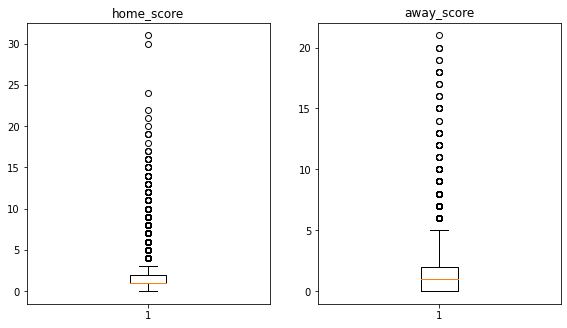

In [ ]:
# Checking for Outliers
#
# save the column names onto a dictionary
columns_dict={ 'home_score':1, 'away_score':2}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(results[variable])
  plt.title(variable)

plt.show()

There are a few outliers in the home score and away score columns in the results column. In this case we will not delete them as they are useful and relay further information in our analysis.

In [ ]:
# checking for anomalies

# find quartile ranges for the column sum of bluecars_taken
q1_life_e = results['home_score'].quantile(.25)
q3_life_e = results['home_score'].quantile(.75)

# calculating inter-quartile range using values from above
iqr_life_e = q3_life_e - q1_life_e

# another way is to find quantiles using the percentiles from the numpy library
q1_l_e, q3_l_e = np.percentile(results['home_score'], [25, 75]) 
# IQR
iqr_l_e = q3_l_e - q1_l_e

# compare if the two values are similar
print(iqr_life_e, iqr_l_e)


1.0 1.0


In [ ]:
# Identifying the Missing Data
#
print(results.isnull().sum())
print('********************')
print(ranking.isnull().sum())

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64
********************
rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64


In [ ]:
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
#Extracting the year and month from the rank date column
#method 1
#ranking['year'] = pd.DatetimeIndex(ranking['rank_date']).year
#ranking.head()

#method 2
year = []
for row in ranking['rank_date']:
    year.append(int(row[:4]))
ranking ['match_year']= year
ranking['month'] = pd.DatetimeIndex(ranking['rank_date']).month
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,match_year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8


In [ ]:
# More data cleaning procedures
# Dropping the columns we dont need from the ranking dataset:these columns are not nenessary in the analysis as they are not directly involved in answering the research questions
ranking=ranking.drop(['country_abrv', 'total_points',
      'previous_points', 'rank_change', 'cur_year_avg',
      'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted','confederation'],1)
ranking

,rank,country_full,rank_date,match_year,month
0,1,Germany,1993-08-08,1993,8
1,2,Italy,1993-08-08,1993,8
2,3,Switzerland,1993-08-08,1993,8
3,4,Sweden,1993-08-08,1993,8
4,5,Argentina,1993-08-08,1993,8
...,...,...,...,...,...
57788,206,Anguilla,2018-06-07,2018,6
57789,206,Bahamas,2018-06-07,2018,6
57790,206,Eritrea,2018-06-07,2018,6
57791,206,Somalia,2018-06-07,2018,6


In [ ]:
ranking.shape

(57793, 5)

In [ ]:
#setting the year and country as index values in the ranking dataset
#ranking=ranking.set_index(['rank_date', 'country_full'])
#ranking

In [ ]:
#getting the status of the home team( whether the home team won, lost or drew in the match)
status = []
for i in range (len(results['home_team'])):
    if results ['home_score'][i] > results['away_score'][i]:
        status.append('Win')
    elif results['home_score'][i] < results ['away_score'][i]:
        status.append('Loss')
    else:
        status.append('Draw')
results['home_status'] = status

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_status
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win


In [ ]:
#Creating a column for year only and dropping those before 1993 and 2018(for uniformity) in the results dataframe. 
#The ranking system started in 1993 rgerefore data befire 1993 is not useful.
year = []
for row in results['date']:
    year.append(int(row[:4]))
results ['match_year']= year
results_1993=results[results.match_year >=1993]
results_2018=results_1993[results_1993.match_year < 2019]

years_only=results_2018['match_year']
years_only.count()

#Extracting the year from the rank date column
results_2018['month'] = pd.DatetimeIndex(results_2018['date']).month
results_2018.head()

results_2018.tail(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_status,match_year,month
40348,2018-12-31,Kyrgyzstan,Palestine,2,1,Friendly,Doha,Qatar,True,Win,2018,12
40349,2018-12-31,Philippines,Vietnam,2,4,Friendly,Doha,Qatar,True,Loss,2018,12
40350,2018-12-31,Qatar,Iran,1,2,Friendly,Doha,Qatar,False,Loss,2018,12


In [ ]:
#merging the two dataframes into one dataframe

#new=results_2018.merge( ranking,left_on=['country','match_year','month'], right_on=['country_full','match_year','month'],how='inner')
#new.drop_duplicates()
#new.head()

In [ ]:
#df1 = new[new['home_team'] == new['country_full']]
#df1.rename(columns={'rank':'home_team_rank'}, inplace=True)
#df1

In [ ]:
#df2 = new[new['away_team'] == new['country_full']]
#df2.rename(columns={'rank':'home_team_rank'}, inplace=True)
#df2

In [ ]:
#Merging he two dataframes based on the year the match was played and the month to create a new dataframe
new2=pd.merge(results_2018, ranking, how = 'left', left_on = ['match_year', 'month'], right_on = ['match_year', 'month'])
new2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_status,match_year,month,rank,country_full,rank_date
0,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,Draw,1993,1,NaN,NaN,NaN
1,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Libreville,Gabon,False,Draw,1993,1,NaN,NaN,NaN
2,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait City,Kuwait,False,Win,1993,1,NaN,NaN,NaN
3,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Libreville,Gabon,True,Win,1993,1,NaN,NaN,NaN
4,1993-01-03,Gabon,Ghana,2,3,Friendly,Libreville,Gabon,False,Loss,1993,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295911,2018-12-30,Yemen,Syria,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,Loss,2018,12,NaN,NaN,NaN
4295912,2018-12-31,South Korea,Saudi Arabia,0,0,Friendly,Abu Dhabi,United Arab Emirates,True,Draw,2018,12,NaN,NaN,NaN
4295913,2018-12-31,Kyrgyzstan,Palestine,2,1,Friendly,Doha,Qatar,True,Win,2018,12,NaN,NaN,NaN
4295914,2018-12-31,Philippines,Vietnam,2,4,Friendly,Doha,Qatar,True,Loss,2018,12,NaN,NaN,NaN


In [ ]:
#merged= pd.merge(results,ranking,on='Product_ID',how='outer',indicator=True)

#merged=pd.merge(results.drop_duplicates(),ranking,left_on='country',right_on='country_full')
#merged


#merged = results_2018.merge(ranking, left_on='date', right_on='rank_date')
#merged.drop_duplicates()

#merge=pd.merge(results_2018,ranking,how='inner',left_on=['date','country'],right_on=['rank_date','country_full'])
#merge.head(2)

In [ ]:
#Creating a new dataframe with the home teams rank and reanaming that column
df_home_team_rank = new2[new2['home_team'] == new2['country_full']]
df_home_team_rank.rename(columns={'rank':'home_team_rank'}, inplace=True)
df_home_team_rank

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_status,match_year,month,home_team_rank,country_full,rank_date
567,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,Draw,1993,8,19.0,Colombia,1993-08-08
785,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,Loss,1993,8,70.0,Peru,1993-08-08
904,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,Draw,1993,8,22.0,Uruguay,1993-08-08
1143,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,Loss,1993,8,94.0,Venezuela,1993-08-08
1274,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,Draw,1993,8,58.0,Senegal,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294448,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True,Loss,2018,6,27.0,Senegal,2018-06-07
4294687,2018-06-28,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,True,Loss,2018,6,55.0,Panama,2018-06-07
4294856,2018-06-28,England,Belgium,0,1,FIFA World Cup,Kaliningrad,Russia,True,Loss,2018,6,12.0,England,2018-06-07
4295061,2018-06-30,France,Argentina,4,3,FIFA World Cup,Kazan,Russia,True,Win,2018,6,7.0,France,2018-06-07


In [ ]:
#Creating a new dataframe with the away teams rank and reanaming that column
df_away_team_rank = new2[new2['away_team'] == new2['country_full']]
df_away_team_rank.rename(columns={'rank': 'away_team_rank'}, inplace=True)
df_away_team_rank

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_status,match_year,month,away_team_rank,country_full,rank_date
615,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,Draw,1993,8,67.0,Paraguay,1993-08-08
720,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,Loss,1993,8,5.0,Argentina,1993-08-08
917,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,Draw,1993,8,35.0,Ecuador,1993-08-08
1057,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,Loss,1993,8,8.0,Brazil,1993-08-08
1241,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,Draw,1993,8,25.0,Zambia,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294437,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True,Loss,2018,6,16.0,Colombia,2018-06-07
4294653,2018-06-28,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,True,Loss,2018,6,21.0,Tunisia,2018-06-07
4294846,2018-06-28,England,Belgium,0,1,FIFA World Cup,Kaliningrad,Russia,True,Loss,2018,6,3.0,Belgium,2018-06-07
4295059,2018-06-30,France,Argentina,4,3,FIFA World Cup,Kazan,Russia,True,Win,2018,6,5.0,Argentina,2018-06-07


In [ ]:
#Merging the two dataframes with the home team and away team rank
#df1 = pd.concat(([df_home_team_rank, df_away_team_rank], axis=1, join='inner'))
#df1.drop_duplicates()
#df1.count()

new=df_home_team_rank.merge( df_away_team_rank,left_on=['country'], right_on=['country_full'],how='left')
new.drop_duplicates()
new.head()
new.count()

date_x            2062036
home_team_x       2062036
away_team_x       2062036
home_score_x      2062036
away_score_x      2062036
tournament_x      2062036
city_x            2062036
country_x         2062036
neutral_x         2062036
home_status_x     2062036
match_year_x      2062036
month_x           2062036
home_team_rank    2062036
country_full_x    2062036
rank_date_x       2062036
date_y            2061223
home_team_y       2061223
away_team_y       2061223
home_score_y      2061223
away_score_y      2061223
tournament_y      2061223
city_y            2061223
country_y         2061223
neutral_y         2061223
home_status_y     2061223
match_year_y      2061223
month_y           2061223
away_team_rank    2061223
country_full_y    2061223
rank_date_y       2061223
dtype: int64

In [ ]:
#merging the dataframes with the home team and away team ranks into one dataframe
result= pd.merge(df_home_team_rank, df_away_team_rank, how='left',on=['home_team','away_team', 'home_status',
                                                                        'match_year', 'month','tournament',
                                                                        'home_score', 'away_score','neutral', 'city', 'country'])                                                     
result.drop_duplicates()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_status,match_year,month,home_team_rank,country_full_x,rank_date_x,date_y,away_team_rank,country_full_y,rank_date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,Draw,1993,8,19.0,Colombia,1993-08-08,1993-08-01,67.0,Paraguay,1993-08-08
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,Loss,1993,8,70.0,Peru,1993-08-08,1993-08-01,5.0,Argentina,1993-08-08
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,Draw,1993,8,22.0,Uruguay,1993-08-08,1993-08-01,35.0,Ecuador,1993-08-08
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,Loss,1993,8,94.0,Venezuela,1993-08-08,1993-08-01,8.0,Brazil,1993-08-08
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,Draw,1993,8,58.0,Senegal,1993-08-08,1993-08-07,25.0,Zambia,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18767,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True,Loss,2018,6,27.0,Senegal,2018-06-07,2018-06-28,16.0,Colombia,2018-06-07
18768,2018-06-28,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,True,Loss,2018,6,55.0,Panama,2018-06-07,2018-06-28,21.0,Tunisia,2018-06-07
18769,2018-06-28,England,Belgium,0,1,FIFA World Cup,Kaliningrad,Russia,True,Loss,2018,6,12.0,England,2018-06-07,2018-06-28,3.0,Belgium,2018-06-07
18770,2018-06-30,France,Argentina,4,3,FIFA World Cup,Kazan,Russia,True,Win,2018,6,7.0,France,2018-06-07,2018-06-30,5.0,Argentina,2018-06-07


In [ ]:
#dropping the rows with null values for uniformity 
#result.dropna(axis=0,subset=[''])


In [ ]:
#picking the columns we need
final=result[['home_team','home_score','away_team', 'away_score','tournament','match_year','home_team_rank','away_team_rank','neutral','home_status']]
final

,home_team,home_score,away_team,away_score,tournament,match_year,home_team_rank,away_team_rank,neutral,home_status
0,Colombia,0,Paraguay,0,FIFA World Cup qualification,1993,19.0,67.0,False,Draw
1,Peru,0,Argentina,1,FIFA World Cup qualification,1993,70.0,5.0,False,Loss
2,Uruguay,0,Ecuador,0,FIFA World Cup qualification,1993,22.0,35.0,False,Draw
3,Venezuela,1,Brazil,5,FIFA World Cup qualification,1993,94.0,8.0,False,Loss
4,Senegal,0,Zambia,0,FIFA World Cup qualification,1993,58.0,25.0,True,Draw
...,...,...,...,...,...,...,...,...,...,...
18767,Senegal,0,Colombia,1,FIFA World Cup,2018,27.0,16.0,True,Loss
18768,Panama,1,Tunisia,2,FIFA World Cup,2018,55.0,21.0,True,Loss
18769,England,0,Belgium,1,FIFA World Cup,2018,12.0,3.0,True,Loss
18770,France,4,Argentina,3,FIFA World Cup,2018,7.0,5.0,True,Win


The useful columns include:
- home team name: Its is the name of the home team where the game wsa played.
- home team score: It is the score the home team got at the end of a full match will be used in modelling.
- away team name: it is the name if the away team that was playing against the home team
- away team score: the score of the away team at the end of the full match
tournamnet
- match year: the year the game was played. It is usefull as the different teams have different ranks iver the years
home team rank: the rank of the home team in tthat year. Maybe the higher the ranks the better the team olayed and more goals they scored.
-away team rank: the rank of the away team in that year. Maybe the higher then ranks the better the team played and more goals they scored.
- netral: whether the game was played in a neutral venue or not. It affects the outcomes of the match as studies have foudn out that the home team tends to do better (win) as the spectators put a lot of pressure on the referree to favor the home team
-home status: whether the home team lost won or drew the game

In [ ]:
#Checking for null vaues
final.isnull().sum()

home_team            0
home_score           0
away_team            0
away_score           0
tournament           0
match_year           0
home_team_rank       0
away_team_rank    1773
neutral              0
home_status          0
dtype: int64

In [ ]:
final = final.dropna(axis=0, subset=['away_team_rank'])
final

,home_team,home_score,away_team,away_score,tournament,match_year,home_team_rank,away_team_rank,neutral,home_status
0,Colombia,0,Paraguay,0,FIFA World Cup qualification,1993,19.0,67.0,False,Draw
1,Peru,0,Argentina,1,FIFA World Cup qualification,1993,70.0,5.0,False,Loss
2,Uruguay,0,Ecuador,0,FIFA World Cup qualification,1993,22.0,35.0,False,Draw
3,Venezuela,1,Brazil,5,FIFA World Cup qualification,1993,94.0,8.0,False,Loss
4,Senegal,0,Zambia,0,FIFA World Cup qualification,1993,58.0,25.0,True,Draw
...,...,...,...,...,...,...,...,...,...,...
18767,Senegal,0,Colombia,1,FIFA World Cup,2018,27.0,16.0,True,Loss
18768,Panama,1,Tunisia,2,FIFA World Cup,2018,55.0,21.0,True,Loss
18769,England,0,Belgium,1,FIFA World Cup,2018,12.0,3.0,True,Loss
18770,France,4,Argentina,3,FIFA World Cup,2018,7.0,5.0,True,Win


In [ ]:
final.isnull().sum()

home_team         0
home_score        0
away_team         0
away_score        0
tournament        0
match_year        0
home_team_rank    0
away_team_rank    0
neutral           0
home_status       0
dtype: int64

In [ ]:
#Checking whether their are any friendly games in the tournament column
final.tournament.unique()

#Dropping the friendly as they are not competitive and therefore not used in ranking.
final=final[final.tournament != 'Friendly']
final.tournament.unique()

array(['FIFA World Cup qualification',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament',
       'CFU Caribbean Cup qualification', 'African Cup of Nations',
       'CFU Caribbean Cup', 'UEFA Euro qualification', 'Kirin Cup',
       'FIFA World Cup', 'Oceania Nations Cup qualification',
       'Baltic Cup', 'Gulf Cup', 'Simba Tournament', 'CECAFA Cup',
       'Dynasty Cup', "King's Cup", 'SAFF Cup', 'Copa Paz del Chaco',
       'Korea Cup', 'USA Cup', 'Copa América', 'Merdeka Tournament',
       'South Pacific Games', 'UNCAF Cup', 'Oceania Nations Cup',
       'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'Lunar New Year Cup',
       'AFF Championship', 'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup', 'Nehru Cup',
       'COSAFA Cup', 'Tournoi de France', 'Confederations Cup',
       'UAF

The friendly matches are not competitive and therefore not conisidered when ranking teams therefore we will drop them from our dataset.

In [ ]:
#Exporting the final dataset to a new dataset
final=final.to_csv('final.csv')

In [ ]:
final=pd.read_csv('final.csv')
final

,Unnamed: 0,home_team,home_score,away_team,away_score,tournament,match_year,home_team_rank,away_team_rank,neutral,home_status
0,0,Colombia,0,Paraguay,0,FIFA World Cup qualification,1993,19.0,67.0,False,Draw
1,1,Peru,0,Argentina,1,FIFA World Cup qualification,1993,70.0,5.0,False,Loss
2,2,Uruguay,0,Ecuador,0,FIFA World Cup qualification,1993,22.0,35.0,False,Draw
3,3,Venezuela,1,Brazil,5,FIFA World Cup qualification,1993,94.0,8.0,False,Loss
4,4,Senegal,0,Zambia,0,FIFA World Cup qualification,1993,58.0,25.0,True,Draw
...,...,...,...,...,...,...,...,...,...,...,...
10517,18767,Senegal,0,Colombia,1,FIFA World Cup,2018,27.0,16.0,True,Loss
10518,18768,Panama,1,Tunisia,2,FIFA World Cup,2018,55.0,21.0,True,Loss
10519,18769,England,0,Belgium,1,FIFA World Cup,2018,12.0,3.0,True,Loss
10520,18770,France,4,Argentina,3,FIFA World Cup,2018,7.0,5.0,True,Win


#6. Exploratory Analysis

In [ ]:
#creating a frequency table of the home status
home_status=final['home_status'].value_counts()
home_status

Win     5190
Loss    3035
Draw    2297
Name: home_status, dtype: int64

Most of the teams that won the matched played at home therfore the there must be a relationship between playing at home and winning.

In [ ]:
#creating a frequency table of the home status
neutral=final['neutral'].value_counts()
neutral

False    7689
True     2833
Name: neutral, dtype: int64

Most games were not played in neutral ground therefore they somehow affect the outcome of the game swaying the outcome in the direction of the home team.

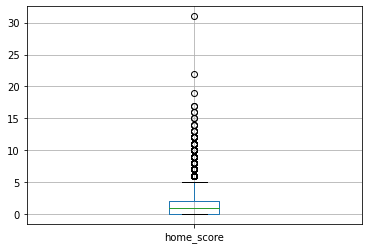

In [ ]:
# Ploting the univariate summaries and recording our observations
#
final.boxplot(column=['home_score'])

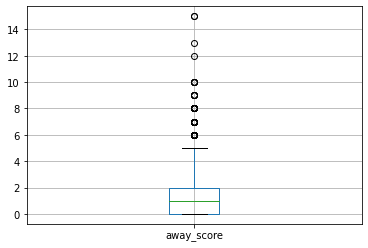

In [ ]:
# Ploting the univariate summaries and recording our observations
#
final.boxplot(column=['away_score'])

In [ ]:
#finding the correlation between the different variables
final.corr()
# Correlation coefficients between -.20 and .20 are generally considered weak, 
# between .20 and .50 (positive or negative) are considered moderate, 
# and above .50 (positive or negative) are considered strong. 

,Unnamed: 0,home_score,away_score,match_year,home_team_rank,away_team_rank,neutral
Unnamed: 0,1.000000,-0.057168,-0.003569,0.997688,0.094534,0.076264,0.011022
home_score,-0.057168,1.000000,-0.207135,-0.055681,-0.155803,0.363316,-0.041832
away_score,-0.003569,-0.207135,1.000000,-0.003540,0.275484,-0.194530,0.107107
match_year,0.997688,-0.055681,-0.003540,1.000000,0.099268,0.081990,0.016215
home_team_rank,0.094534,-0.155803,0.275484,0.099268,1.000000,0.416741,0.068149
away_team_rank,0.076264,0.363316,-0.194530,0.081990,0.416741,1.000000,0.081978
neutral,0.011022,-0.041832,0.107107,0.016215,0.068149,0.081978,1.000000


There is a weak negative correlation between home socre and away score,yeah the game was played and the rank pf the home team.
There is a moderate positive between home score and the rank if the away team meaning that if the away team is ranked highly the home team plays better.
There is a moderate positive correlation between the home team rank and the away team ranks.

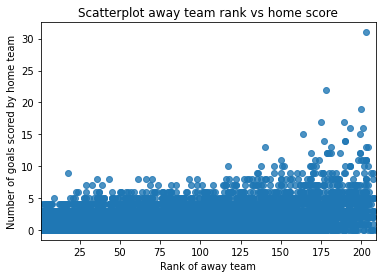

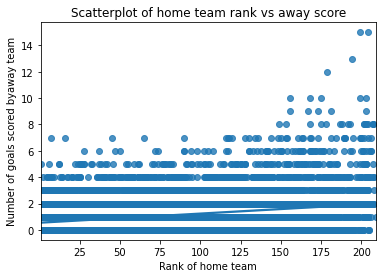

In [ ]:
# Scatterplot of the two columns
# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x=final['away_team_rank'], y=final['home_score'], fit_reg=True)
#plt.scatter(x=final['away_team_rank'], y=final['home_team_rank'], c='red')
plt.title('Scatterplot away team rank vs home score')
plt.xlabel('Rank of away team')
plt.ylabel('Number of goals scored by home team')
plt.show()

# Scatterplot of the two columns
# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x=final['home_team_rank'], y=final['away_score'], fit_reg=True)
#plt.scatter(x=final['away_team_rank'], y=final['home_team_rank'], c='red')
plt.title('Scatterplot of home team rank vs away score')
plt.xlabel('Rank of home team')
plt.ylabel('Number of goals scored byaway team')
plt.show()

The better the rank of the away team the fewer goals the home team was ale to score. This implies that the better an away team is ranked the higher the level of difficulty on the home team. If the away team is of a lower rank the home team is better placed to score more goals and win the game eventually.

#7. Implementing the Solution

#Model 1:  Modelling to predict the number of goals a home team will scores.

In [ ]:
#importing the libraries we need
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
final_1

,Unnamed: 0,home_team,home_score,away_team,away_score,tournament,match_year,home_team_rank,away_team_rank,neutral,home_status
0,0,41,0,137,0,26,1993,19.0,67.0,0,0
1,1,138,0,8,1,26,1993,70.0,5.0,0,1
2,2,184,0,55,0,26,1993,22.0,35.0,0,0
3,3,187,1,27,5,26,1993,94.0,8.0,0,1
4,4,152,0,191,0,26,1993,58.0,25.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10517,18767,152,0,41,1,25,2018,27.0,16.0,1,1
10518,18768,135,1,177,2,25,2018,55.0,21.0,1,1
10519,18769,58,0,19,1,25,2018,12.0,3.0,1,1
10520,18770,66,4,8,3,25,2018,7.0,5.0,1,2


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

#class MultiColumnLabelEncoder:
#    def __init__(self,columns = None):
#        self.columns = columns # array of column names to encode
#
#    def fit(self,X,y=None):
#        return self # not relevant here
#
#    def transform(self,X):
        
#        Transforms columns of X specified in self.columns using
#        LabelEncoder(). If no columns specified, transforms all
#        columns in X.
        
#        output = X.copy()
#        if self.columns is not None:
#            for col in self.columns:
#                output[col] = LabelEncoder().fit_transform(output[col])
#        else:
#            for colname,col in output.iteritems():
#                output[colname] = LabelEncoder().fit_transform(col)
#        return output

#    def fit_transform(self,X,y=None):
#        return self.fit(X,y).transform(X)

#final_1=MultiColumnLabelEncoder(columns = ['home_team','away_team','tournament','home_status','neutral']).fit_transform(final)
#final_1.head()

In [ ]:
#Get the 2 and the last column from the dataset 
X = final_1[['tournament','home_team_rank','away_team_rank','neutral','match_year']]

y = final_1['home_score']
print(X)
print(y)
#The tournamnet type is picked as it will dictate the level of competitivenesss the teams will put out.
#The home team rank and away team rank are picked as they have a positive moderate correlation with the score
# Nueatral was picked as wther a game was played in a neutral ground affects the outcome of the match from previous research.

X = pd.get_dummies(X, drop_first=True)
X

       tournament  home_team_rank  away_team_rank  neutral  match_year
0              26            19.0            67.0        0        1993
1              26            70.0             5.0        0        1993
2              26            22.0            35.0        0        1993
3              26            94.0             8.0        0        1993
4              26            58.0            25.0        1        1993
...           ...             ...             ...      ...         ...
10517          25            27.0            16.0        1        2018
10518          25            55.0            21.0        1        2018
10519          25            12.0             3.0        1        2018
10520          25             7.0             5.0        1        2018
10521          25            14.0             4.0        1        2018

[10522 rows x 5 columns]
0        0
1        0
2        0
3        1
4        0
        ..
10517    0
10518    1
10519    0
10520    4
10521    2
N

,tournament,home_team_rank,away_team_rank,neutral,match_year
0,26,19.0,67.0,0,1993
1,26,70.0,5.0,0,1993
2,26,22.0,35.0,0,1993
3,26,94.0,8.0,0,1993
4,26,58.0,25.0,1,1993
...,...,...,...,...,...
10517,25,27.0,16.0,1,2018
10518,25,55.0,21.0,1,2018
10519,25,12.0,3.0,1,2018
10520,25,7.0,5.0,1,2018


###Checking for multicollinearity

In [ ]:
# Let's display the correlations between the variables
correlations=X.corr()
correlations

,tournament,home_team_rank,away_team_rank,neutral,match_year
tournament,1.000000,-0.181589,-0.194909,-0.102544,-0.077456
home_team_rank,-0.181589,1.000000,0.416741,0.068149,0.099268
away_team_rank,-0.194909,0.416741,1.000000,0.081978,0.081990
neutral,-0.102544,0.068149,0.081978,1.000000,0.016215
match_year,-0.077456,0.099268,0.081990,0.016215,1.000000


In [ ]:
#Creating a dataframe and getting the inverse
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,tournament,home_team_rank,away_team_rank,neutral,match_year
tournament,1.063687,0.121077,0.144971,0.088013,0.057057
home_team_rank,0.121077,1.231898,-0.481269,-0.030901,-0.072949
away_team_rank,0.144971,-0.481269,1.236573,-0.053035,-0.041523
neutral,0.088013,-0.030901,-0.053035,1.015515,-0.002233
match_year,0.057057,-0.072949,-0.041523,-0.002233,1.015102


The rule of thumb threshold is VIF at the level of 2.5, meaning if the VIF is above 2.5 you should consider there is effect of multicollinearity. Therefore we will not drop any column as we dont risk building a model with high multicolinearity.

In [ ]:
#seeing if the VIF score will change if we remove the home status
#revised = X.drop(columns=['home_status'])

#correlations = revised.corr()
#pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

###Building the model

In [ ]:
final_1.columns

Index(['Unnamed: 0', 'home_team', 'home_score', 'away_team', 'away_score',
       'tournament', 'match_year', 'home_team_rank', 'away_team_rank',
       'neutral', 'home_status'],
      dtype='object')

In [ ]:
#Using the home team rank to create model
X = final_1[['tournament','home_team_rank','away_team_rank','neutral','match_year']].values

y = final_1['home_score'].values
print(X)
print(y)
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. 
# We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
#plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
#plt.plot(X, reg_line.predict(X), color='red')
#plt.title('Salary Prediction(Linear Regression)')
#plt.xlabel('Position Level')
#plt.ylabel('Salary')
#plt.show()

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2)

X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
#plt.scatter(X, y, color='blue' ) # You can put any color you like. This just helps us highlight the data points
#plt.plot(X, pol_reg.predict(X_poly), color='red')
#plt.title('Salary Prediction (Polynomial Regression)')
#plt.xlabel('Position Level')
#plt.ylabel('Salary')
#plt.figure(figsize=(20,20))
#plt.show()

pol_reg.predict(poly_reg.fit_transform([[1,50,50,1,2000]]))

[[2.600e+01 1.900e+01 6.700e+01 0.000e+00 1.993e+03]
 [2.600e+01 7.000e+01 5.000e+00 0.000e+00 1.993e+03]
 [2.600e+01 2.200e+01 3.500e+01 0.000e+00 1.993e+03]
 ...
 [2.500e+01 1.200e+01 3.000e+00 1.000e+00 2.018e+03]
 [2.500e+01 7.000e+00 5.000e+00 1.000e+00 2.018e+03]
 [2.500e+01 1.400e+01 4.000e+00 1.000e+00 2.018e+03]]
[0 0 0 ... 0 4 2]


array([1.18815109])

In [ ]:
# Predict using linear regression
lin_pred = reg_line.predict([[1,50,50,1,2000]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[1,50,50,1,2000]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg.fit_transform(X))
print(poly_arr_pred)

Linear prediction: 1
Polynomial prediction: 1
[2.30972926 0.85917893 1.71846113 ... 1.38761933 1.42346811 1.36948287]


The lienar regression model and polynomial regression model made the same prediction of the home score in both cases.

###Cross validation  using  repeated kfold 

A single run of the k-fold cross-validation procedure may result in a noisy estimate of model performance. Different splits of the data may result in very different results. ... Repeated k-fold cross-validation provides a way to reduce the error in the estimate of mean model performance.

In [ ]:
import numpy as np
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# We will use the same 4 independent variables for this
X = final_1[['tournament','home_team_rank','away_team_rank','neutral','match_year']].values

y = final_1['home_score'].values

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=2652124)

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 


for train_index, test_index in rkf.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
# set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
     X_train, X_test = X[train_index], X[test_index]     
     y_train, y_test = y[train_index], y[test_index]

  # fit a model accordingly
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
y_pred = regressor.predict(X_test)

rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))

RMSES.append(rmse_value)
  
count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

# evaluate model
#scores = cross_val_score(regressor, X, y, scoring='accuracy', cv=rkf, n_jobs=-1)
# report performance
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

TRAIN: [    1     2     4 ... 10519 10520 10521] TEST: [    0     3    12 ... 10506 10511 10514]
TRAIN: [    0     2     3 ... 10518 10519 10520] TEST: [    1     4     6 ... 10504 10508 10521]
TRAIN: [    0     1     2 ... 10519 10520 10521] TEST: [    5     9    21 ... 10510 10515 10517]
TRAIN: [    0     1     2 ... 10518 10519 10521] TEST: [   10    15    16 ... 10505 10513 10520]
TRAIN: [    0     1     3 ... 10517 10520 10521] TEST: [    2    43    46 ... 10516 10518 10519]
TRAIN: [    0     1     2 ... 10519 10520 10521] TEST: [   13    16    23 ... 10503 10509 10518]
TRAIN: [    0     1     2 ... 10518 10519 10521] TEST: [   19    29    32 ... 10500 10508 10520]
TRAIN: [    0     1     2 ... 10519 10520 10521] TEST: [    3     6    10 ... 10502 10515 10516]
TRAIN: [    0     2     3 ... 10519 10520 10521] TEST: [    1     4     5 ... 10499 10501 10517]
TRAIN: [    1     3     4 ... 10517 10518 10520] TEST: [    0     2    15 ... 10514 10519 10521]
TRAIN: [    1     3     4 ... 

1.508536932335562

In [ ]:
# To improve on the model, all we need to do is to increase degree of the polynomial
# Let's increase the degree to 3

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#display the intercept / bias
print(reg_line.intercept_)

#display the coefficient
print(reg_line.coef_)

32.65380120942025
[ 0.00106552 -0.012126    0.01707088 -0.22942678 -0.01564661]


In [ ]:
#MAE
#metrics.mean_absolute_error(X_test, poly_pred)

###Residual plots and heteroskedasticity plots

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = final_1[['tournament','home_team_rank','away_team_rank','neutral','match_year']].values
y = final_1['home_score'].values

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

#X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# This is our prediction for admission based on our model
poly_pred = regressor.predict(X_test)
#admit_predict
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(poly_pred, Y_test)
#residuals
# Let's describe our residual:
print(pd.DataFrame(residuals).describe())

residuals.mean()

                 0
count  2105.000000
mean     -0.027501
std       1.617872
min     -27.111769
25%      -0.725627
50%       0.188965
75%       0.967120
max       3.344445


-0.027500863810369015

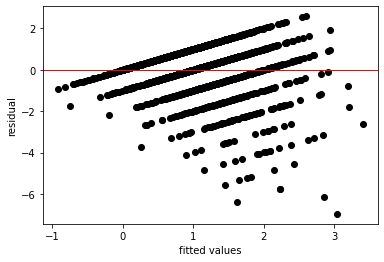

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(poly_pred, residuals, color='black')
plt.ylabel('residual')


plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
#bartlett's test for heteroskedasticity
import scipy as sp

test_result, p_value = sp.stats.bartlett(poly_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(poly_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print(test_result)
# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data


# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
850.5445377635714
the variances are homogeneous!


### Challenging the solution

In [ ]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [ ]:
# Training and Cross Validation
# ---
# 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)

In [ ]:
# Training and Cross Validation
# ---
# Next, to implement cross validation, the cross_val_score method 
# of the sklearn.model_selection library can be used. 
# The cross_val_score returns the accuracy for all the folds. 
# Values for 5 parameters are required to be passed to the cross_val_score class. 
# The first parameter is estimator which basically specifies 
# the algorithm that you want to use for cross validation. 
# The second and third parameters, X and y, contain the X_train and y_train data i.e. features and labels. 
# Finally the number of folds is passed to the cv parameter as shown in the following code
# ---
# 
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
all_accuracies

ValueError: ignored

#Model 2:Polynomial regression: Predict how many goals the away team scores. 

In [ ]:
#importing the libraries we need
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Get the 2 and the last column from the dataset 
X = final_1[['tournament','home_team_rank','away_team_rank','neutral','match_year']]

y = final_1['away_score']
print(X)
print(y)
#The tournamnet type is picked as it will dictate the level of competitivenesss the teams will put out.
#The home team rank and away team rank are picked as they have a positive moderate correlation with the score
# Nueatral was picked as wther a game was played in a neutral ground affects the outcome of the match from previous research.

X = pd.get_dummies(X, drop_first=True)
X

       tournament  home_team_rank  away_team_rank  neutral  match_year
0              26            19.0            67.0        0        1993
1              26            70.0             5.0        0        1993
2              26            22.0            35.0        0        1993
3              26            94.0             8.0        0        1993
4              26            58.0            25.0        1        1993
...           ...             ...             ...      ...         ...
10517          25            27.0            16.0        1        2018
10518          25            55.0            21.0        1        2018
10519          25            12.0             3.0        1        2018
10520          25             7.0             5.0        1        2018
10521          25            14.0             4.0        1        2018

[10522 rows x 5 columns]
0        0
1        1
2        0
3        5
4        0
        ..
10517    1
10518    2
10519    1
10520    3
10521    1
N

,tournament,home_team_rank,away_team_rank,neutral,match_year
0,26,19.0,67.0,0,1993
1,26,70.0,5.0,0,1993
2,26,22.0,35.0,0,1993
3,26,94.0,8.0,0,1993
4,26,58.0,25.0,1,1993
...,...,...,...,...,...
10517,25,27.0,16.0,1,2018
10518,25,55.0,21.0,1,2018
10519,25,12.0,3.0,1,2018
10520,25,7.0,5.0,1,2018


###Checking for multicollinearity

In [ ]:
# Let's display the correlations between the variables
correlations=X.corr()
correlations

,tournament,home_team_rank,away_team_rank,neutral,match_year
tournament,1.000000,-0.181589,-0.194909,-0.102544,-0.077456
home_team_rank,-0.181589,1.000000,0.416741,0.068149,0.099268
away_team_rank,-0.194909,0.416741,1.000000,0.081978,0.081990
neutral,-0.102544,0.068149,0.081978,1.000000,0.016215
match_year,-0.077456,0.099268,0.081990,0.016215,1.000000


In [ ]:
#Creating a dataframe and getting the inverse
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,tournament,home_team_rank,away_team_rank,neutral,match_year
tournament,1.063687,0.121077,0.144971,0.088013,0.057057
home_team_rank,0.121077,1.231898,-0.481269,-0.030901,-0.072949
away_team_rank,0.144971,-0.481269,1.236573,-0.053035,-0.041523
neutral,0.088013,-0.030901,-0.053035,1.015515,-0.002233
match_year,0.057057,-0.072949,-0.041523,-0.002233,1.015102


###Building the model

In [ ]:
#Using the home team rank to create model
X = final_1[['tournament','home_team_rank','away_team_rank','neutral','match_year']].values

y = final_1['away_score'].values
print(X)
print(y)
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Scaling our Data
# ---

#from sklearn.preprocessing import StandardScaler
#feature_scaler = StandardScaler()
#X_train = feature_scaler.fit_transform(X_train)
#X_test = feature_scaler.transform(X_test)

[[2.600e+01 1.900e+01 6.700e+01 0.000e+00 1.993e+03]
 [2.600e+01 7.000e+01 5.000e+00 0.000e+00 1.993e+03]
 [2.600e+01 2.200e+01 3.500e+01 0.000e+00 1.993e+03]
 ...
 [2.500e+01 1.200e+01 3.000e+00 1.000e+00 2.018e+03]
 [2.500e+01 7.000e+00 5.000e+00 1.000e+00 2.018e+03]
 [2.500e+01 1.400e+01 4.000e+00 1.000e+00 2.018e+03]]
[0 1 0 ... 1 3 1]


In [ ]:
# Fit Linear Regression model to the dataset(this is optional. 
# We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


pol_reg.predict(poly_reg.fit_transform([[1,50,50,1,2000]]))

array([1.25494936])

In [ ]:
# Predict using linear regression
lin_pred = reg_line.predict([[1,50,50,1,2000]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[1,50,50,1,2000]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg.fit_transform(X))
print(poly_arr_pred)

Linear prediction: 1
Polynomial prediction: 1
[0.47751979 1.89046179 0.78487199 ... 1.52329777 1.4280017  1.52082886]


The lienar regression model and polynomial regression model made the same prediction of the home score in both cases.

###Cross validation using the repeated kfold approach

In [ ]:
import numpy as np
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# We will use the same 4 independent variables for this
X = final_1[['tournament','home_team_rank','away_team_rank','neutral','match_year']].values

y = final_1['away_score'].values

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=2652124)

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 


for train_index, test_index in rkf.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
# set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
     X_train, X_test = X[train_index], X[test_index]     
     y_train, y_test = y[train_index], y[test_index]

  # fit a model accordingly
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

  
  # assess the accuraccy of the model
y_pred = regressor.predict(X_test)

rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))

RMSES.append(rmse_value)
  
count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

# evaluate model
#scores = cross_val_score(regressor, X, y, scoring='accuracy', cv=rkf, n_jobs=-1)
# report performance
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

TRAIN: [    1     2     4 ... 10519 10520 10521] TEST: [    0     3    12 ... 10506 10511 10514]
TRAIN: [    0     2     3 ... 10518 10519 10520] TEST: [    1     4     6 ... 10504 10508 10521]
TRAIN: [    0     1     2 ... 10519 10520 10521] TEST: [    5     9    21 ... 10510 10515 10517]
TRAIN: [    0     1     2 ... 10518 10519 10521] TEST: [   10    15    16 ... 10505 10513 10520]
TRAIN: [    0     1     3 ... 10517 10520 10521] TEST: [    2    43    46 ... 10516 10518 10519]
TRAIN: [    0     1     2 ... 10519 10520 10521] TEST: [   13    16    23 ... 10503 10509 10518]
TRAIN: [    0     1     2 ... 10518 10519 10521] TEST: [   19    29    32 ... 10500 10508 10520]
TRAIN: [    0     1     2 ... 10519 10520 10521] TEST: [    3     6    10 ... 10502 10515 10516]
TRAIN: [    0     2     3 ... 10519 10520 10521] TEST: [    1     4     5 ... 10499 10501 10517]
TRAIN: [    1     3     4 ... 10517 10518 10520] TEST: [    0     2    15 ... 10514 10519 10521]
TRAIN: [    1     3     4 ... 

1.1671871620771674

In [ ]:
#display the intercept / bias
print(reg_line.intercept_)

#display the coefficient
print(reg_line.coef_)

32.65380120942025
[ 0.00106552 -0.012126    0.01707088 -0.22942678 -0.01564661]


###Residual plots and heteroskedasticity

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = final_1[['tournament','home_team_rank','away_team_rank','neutral','match_year']].values
y = final_1['away_score'].values

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

#X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# This is our prediction for admission based on our model
poly_pred = regressor.predict(X_test)
#admit_predict
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(poly_pred, Y_test)
#residuals
# Let's describe our residual:
print(pd.DataFrame(residuals).describe())

residuals.mean()

                 0
count  2105.000000
mean     -0.031194
std       1.160795
min      -6.969707
25%      -0.607274
50%       0.161757
75%       0.754678
max       2.590530


-0.031193571268488405

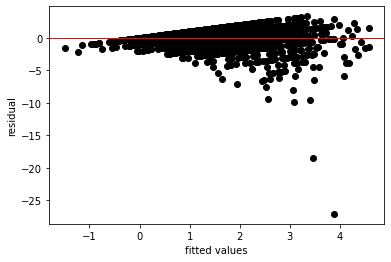

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(poly_pred, residuals, color='black')
plt.ylabel('residual')

plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
#bartlett's test for heteroskedasticity
import scipy as sp

test_result, p_value = sp.stats.bartlett(poly_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(poly_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print(test_result)
# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
772.1695348170057
the variances are homogeneous!


###Challenging the solution

In [ ]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [ ]:
# Training and Cross Validation
# ---
# 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)

In [ ]:
# Training and Cross Validation
# ---
# Next, to implement cross validation, the cross_val_score method 
# of the sklearn.model_selection library can be used. 
# The cross_val_score returns the accuracy for all the folds.                  
# Values for 4 parameters are required to be passed to the cross_val_score class. 
# The first parameter is estimator which basically specifies 
# the algorithm that you want to use for cross validation. 
# The second and third parameters, X and y, contain the X_train and y_train data i.e. features and labels. 
# Finally the number of folds is passed to the cv parameter as shown in the following code
# ---
# 
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
all_accuracies

ValueError: ignored

#Logistic regression

ASSUMPTIONS MADE

- No outliers in the data. An outlier can be identified by analyzing the independent variables
- No correlation (multi-collinearity) between the independent variables.

### EDA and feature engineering

In [ ]:
final.head()


In [ ]:
# Checking that our target variable
# Since we are building a model to predict how a team fairs on from the perspective of hte home team
# our target is going to be home_status variable from the final dataframe. 
# let's use Seaborn's countplot() function to make sure there are just 3 varibles.
# 
sns.countplot(x='home_status',data=final, palette='hls')

# from the output we see that the home_status variable are 3: draw, loss and win.

In [ ]:
#checking for null values
final.isnull().sum()
#no missing values found in he dataset

In [ ]:
# Understanding the dataset abit more
# 
final.info()

# Ok, so there are only10522 rows in the final data frame. 
# Since we are predicting theprobability of a home team winning, lossing or drwaing
# we are going to use the home team rank column, the away team rank
#and  the touranment type(level of competitiveness).
# These 3 features are good indicators of the competitiveness of the game and would be good in predicting whether a game is won, lost or drawn


In [ ]:
#Choosing the columns we will use
outcome=final[['home_team_rank','away_team_rank','tournament','home_status']]
outcome

In [ ]:
#finding the number of unique entries in the tournament column
print(outcome.tournament.unique())
outcome.tournament.value_counts()

In [ ]:
# There is no greater competition than the World Cup. Therefore we are going to pick the fifa world cup and qualification tournaments to predict who is going to win the world cup
#Choosing multiple values you want to include, put them in a list (or more generally, any iterable) and use isin:
tournamnet=outcome.loc[outcome['tournament'].isin(['FIFA World Cup','FIFA World Cup qualification'])]


In [ ]:
#Dropoing the tournament column from the outcome dataframe
outcome.drop(['tournament'],axis=1,inplace=True)
outcome.head()

In [ ]:
# Converting categorical variables to a dummy indicators
# ---
# The next thing we need to do is reformat our variables so that they work with the model. 
# Specifically, we need to reformat the Sex and Embarked variables into numeric variables.
#
tournament = pd.get_dummies(tournamnet['tournament'],drop_first=True)
tournament.head()

In [ ]:
fifa = pd.concat([outcome,tournament],axis=1)
fifa.head()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        
#        Transforms columns of X specified in self.columns using
#        LabelEncoder(). If no columns specified, transforms all
#        columns in X.
        
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

fifa=MultiColumnLabelEncoder(columns = ['home_status']).fit_transform(fifa)
fifa.head()

# Now we have a dataset with all the variables in the correct format!

###Checking for multicollinearity

In [ ]:
# Remove the home_status columns, we want to focus on our independent variables only.
independent_only = fifa.drop(columns=['home_status'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

In [ ]:
# Checking for independence between features¶
# 
import matplotlib.pyplot as plt
 

plt.subplots(figsize=(15, 10))
sns.heatmap(fifa.corr(), annot=True) 
#the variables are independent of each other therefore we can move on

In [ ]:
# Checking that your dataset size is sufficient
# We have 3 predictive features that remain. The rule of thumb is 50 records per feature 
# so we need to have at least 300 records in this dataset. Let's check again.
#
fifa.info()          
# From the output we have 10522 records and a good number of them are null as they dont belong to the fifa world cup or qualifcation tournaments

results_2018.head(2)

In [ ]:
#Checking number of null values
fifa.isnull().sum()


In [ ]:
#dropping the null values
fifa1=fifa.dropna()
fifa1

# Checking for Outliers
#
# save the column names onto a dictionary
columns_dict={ 'home_team_rank':1, 'away_team_rank':2}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(fifa1[variable])
  plt.title(variable)

plt.show()

###Building the model

Since there ar no outliers and there is no collinearity between the independent variables we can go ahead and continue with the modelling.

In [ ]:
# Splitting our dataset
#
X = fifa1.drop("home_status",axis=1)
y = fifa1["home_status"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [ ]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

In [ ]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)
y_pred

In [ ]:
import numpy as np
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# count of predicted array only
# 0 - Draw and 1 Loss 2- win
# 13 draws and 408 losses and 820 wins

In [ ]:
import numpy as np
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# # 276 draws and 348 losses and 617 wins

In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# The results from the confusion matrix tell us that 4 draws 244 losses and 557 wins were prdicted correctly
# 109- actual draws and 55 wins predicted as losses
#4 actual losses and 5actual wins predicted predicted as draws
#163 actual draws and 100 actual losses predicted as wins
# 

In [ ]:
# sklearn accuracy score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test, y_test)))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

###Cross validation of the logistic regression

In [ ]:
# Scaling our Data
# ---
# 
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [ ]:
# Training and Cross Validation
# ---
# 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [ ]:
# We will use the same 4 independent variables for this
from sklearn.model_selection import KFold
X = fifa1.drop("home_status",axis=1).values
y = fifa1["home_status"].values
folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()



As you can tell from running the code, the RMSE value for our second and forth model are fairly larger than the RMSE of the other models ad for what we found above. This would beg for an analysis of the specific indeces used. 

The third model had the lowest RMSE.

As a challenge, perform a comparative analysis of the subset of the data used to test model 1 in comparison with the dataset as a whole.

Another useful observation is comparing the average RMSE value of all these models to the one we obtain in our initial approache. We created the array RMSES to gather all the RMSE values, we can compute the average simply as follows

In [ ]:
np.mean(RMSES)

repeated kfold Cross validation approach


Then, create a model to predict university admission again, this time using all independent varible, and krepeated kfold of your choice. Can you improve on the results without cross validation? Can you improve on the results from the kfold cross validation?

In [ ]:
import numpy as np
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# We will use the same 4 independent variables for this

X = fifa1.drop("home_status",axis=1).values
y = fifa1["home_status"].values

rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=2652124)

for train_index, test_index in rkf.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
# set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
     X_train, X_test = X[train_index], X[test_index]     
     y_train, y_test = y[train_index], y[test_index]

  # fit a model accordingly
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
y_pred = regressor.predict(X_test)
  
rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSES.append(rmse_value)
  
count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

# prepare the cross-validation procedure
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=2652124)
# create model
regressor = LogisticRegression()
# evaluate model
scores = cross_val_score(regressor, X, y, scoring='accuracy', cv=rkf, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
count = count + 1

print('mean RMSE', np.mean(RMSES))

import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

With the reapeated kfold cross validation, 12 models were trained with an overall accuracy of 0.645. 

The mean RMSE is 0.7258 which is slightly higher than kfold approach.

In [ ]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)
#residuals
# Let's describe our residual:
print(pd.DataFrame(residuals).describe())

residuals.mean()

Our min and max for the residual are fairly high: they suggest we've been up to 198% off target. It's important for us to plot this first: Is this a common occurence, or a few outliers?

Our mean on the other hand is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average, 10%

In [ ]:
#plotting the residual plto
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Although our residuals are centered around a mean that is very close to 0, and they do follow a patterns. Let's be thorough though, and perform a heteroskedasticity test.

For this we will use bartlett's test. The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [ ]:
#bartlett's test for heteroskedasticity
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print(test_result)
# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


In [ ]:
# Training and Cross Validation
# ---
# Next, to implement cross validation, the cross_val_score method 
# of the sklearn.model_selection library can be used. 
# The cross_val_score returns the accuracy for all the folds. 
# Values for 4 parameters are required to be passed to the cross_val_score class. 
# The first parameter is estimator which basically specifies 
# the algorithm that you want to use for cross validation. 
# The second and third parameters, X and y, contain the X_train and y_train data i.e. features and labels. 
# Finally the number of folds is passed to the cv parameter as shown in the following code
# ---
# 
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
all_accuracies

In [ ]:
# Printing the accuracies returned for five folds 
# by the cross_val_score method by calling print on all_accuracies
# ---
#
print(all_accuracies.mean())

In [ ]:
# Step 1: Hyperparameters: Getting Started with Random Search
# ---
# Random search differs from grid search in that we no longer 
# provide a discrete set of values to explore for each hyperparameter; rather, 
# we provide a statistical distribution for each hyperparameter 
# from which values may be randomly sampled.
# We'll define a sampling distribution for each hyperparameter.
# ---
# 

# specify parameters and distributions to sample from
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [ ]:
# Step 2: Instantiating RandomizedSearchCV object 
# ---
# 
from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 5)

In [ ]:
# Step 3: Calling the fit method
# ---
#
random_sr.fit(X_train, y_train)

In [ ]:
# Step 4: Checking the parameters that return the highest accuracy
# ---
#
best_parameters = random_sr.best_params_
print(best_parameters)
# The result shows that the highest accuracy is achieved 
# when the n_estimators are 300, bootstrap is True and criterion is "gini". 
# It would be a good idea to add more number of estimators 
# and see if performance further increases since the highest 
# allowed value of n_estimators was chosen.

The result shows that the highest accuracy is achieved 
 when the  bootstrap is False and criterion is "gini", max depth is 3, max features are 3 and mini saample split is 3.


In [ ]:
# Finding the obtained accuracy
# --
# 
best_result = random_sr.best_score_
print(best_result)


#Follow up questions

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth

a). Did we have the right data?

We  have the right data as it has the needed features and variables needed for the predicitions needed. It is also

b). Do we need other data to answer our question?
We do not need more data to answer the questions and make predictions as the one we have is satisfactory

c). Did we have the right question?

Yes we have the right questions.